In [8]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline
#import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')

In [9]:
def load_data(path):

    database = {}
    filenames = glob.glob(os.path.join(path, "*.npz"))

    for file in filenames:
        data = np.load(file)
        key = file.split("/")[-1]
        key = key.split(".")[0]
        key = key.split("\\")[-1]
        key = key.split("_")[-1]
        database[key] = {}

        for count, properties in enumerate(data.files):
            value = data[properties].astype(float)
            database[key][properties] = value

    return database

In [10]:
def autolabel(ax, rects):
    for rect in rects:
        height = rect.get_height()
        #print(height)
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=16)

In [11]:
def plot_benchmark_distr(data):   

    times = {}
    comm = []
    labels = []
    
    for label in list(data.keys()):
        result = label.split("-")
        
        
        if any(x in label for x in ["Local", "local"]):
            continue
        else:                
            comm.append(result[-1])
            times[result[0]] = {}
    
    comm = np.array(comm)
    comm = list(np.unique(comm))
    labels = list(times.keys())
    
    
    for label in list(data.keys()):
        scheme = label.split("-")[0]
        freq = label.split("-")[-1]
        
        if(scheme == freq):
            #times[scheme] = data[label]['mean_execution_time'][0]
            continue
        
        times[scheme][freq] = data[label]['mean_execution_time'][0]
        
    x = np.arange(len(comm))  # the label locations
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(16,8))
    plt.rcParams['xtick.labelsize']=16
    plt.rcParams['ytick.labelsize']=16
    rects1 = ax.bar(x - width/2, times['01'].values(), width, label='Scheme: 01')
    rects2 = ax.bar(x + width/2, times['02'].values(), width, label='Scheme: 02')
    
    ax.set_ylabel('Execution time in seconds', fontsize=16)
    ax.set_title('Benchmark comparison among communication schemes', fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(comm)
    ax.set_xlabel('Communication frequency', fontsize=16)
    ax.legend(fontsize='x-large')
    
    
    autolabel(ax, rects1)
    autolabel(ax, rects2)
    
    fig.tight_layout()
    plt.grid()
    plt.show()    

### Main

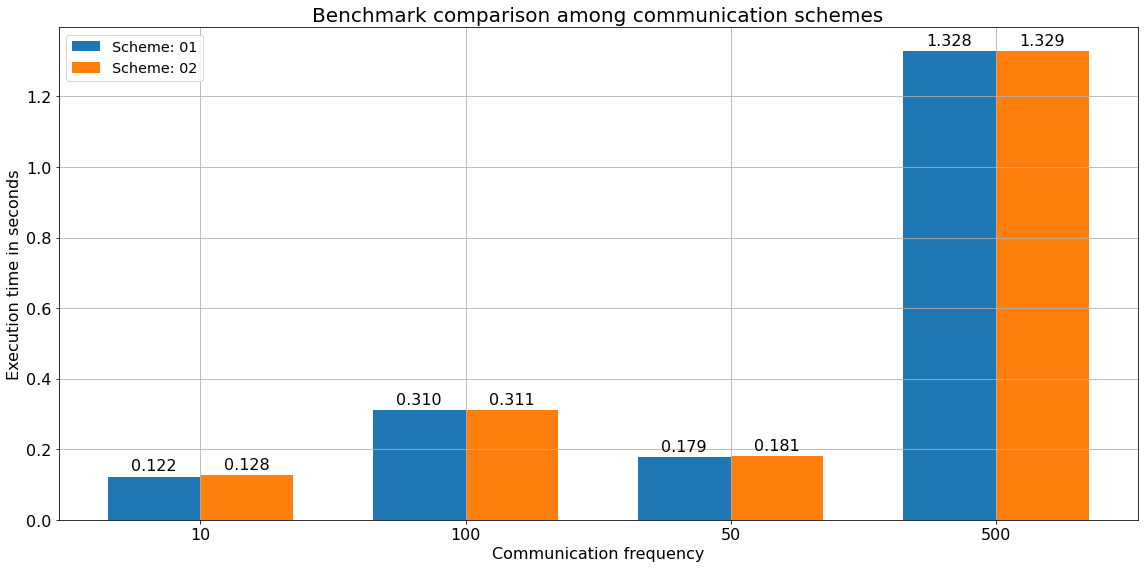

In [12]:
result_dir = "results"

data = load_data(os.path.join(os.getcwd(), result_dir))

plot_benchmark_distr(data)